This visualization is meant to show how reading scores change over time. The original test score file contained raw scores used in the LSTM model and linear regression, but it also contained letter grades:  A = Advanced, P = Proficient, PP = Partially Proficient, U = Unsatisfactory.

In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = None
pd.options.display.max_rows = None
import matplotlib.pyplot as plt
import matplotlib

In [2]:
df = pd.read_csv('TestScores.csv')
df['Test'] = df.TestName.map(str) + ' ' + df.MeasureCode
df.head()

/Applications/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SchoolYear,Semester,TestName,TestCategory,MeasureCode,StudentNumber,Grade,SkillName,RawScore,ScaleScore,Growth,ProficiencyLevel,Test
0,2000-2001,Spring,CSAP Math,CSAP,Math,401551,5,Math,NaN,NaN,NaN,NS,CSAP Math Math
1,2000-2001,Spring,CSAP Reading,CSAP,Reading,401551,5,Reading,NaN,NaN,NaN,NS,CSAP Reading Reading
2,2001-2002,Spring,CSAP Math,CSAP,Math,401551,6,Math,NaN,NaN,NaN,NS,CSAP Math Math
3,2001-2002,Spring,CSAP Reading,CSAP,Reading,401551,6,Reading,NaN,NaN,NaN,NS,CSAP Reading Reading
4,2001-2002,Spring,CSAP Writing,CSAP,Writing,401551,6,Writing,NaN,NaN,NaN,NS,CSAP Writing Writing


In [3]:
csap = df[df.Test == 'CSAP Reading Reading']
csap = csap[csap['ProficiencyLevel'] != 'NS']
csap.head()

,SchoolYear,Semester,TestName,TestCategory,MeasureCode,StudentNumber,Grade,SkillName,RawScore,ScaleScore,Growth,ProficiencyLevel,Test
70,2000-2001,Spring,CSAP Reading,CSAP,Reading,405587,4,Reading,NaN,414,NaN,U,CSAP Reading Reading
108,2001-2002,Spring,CSAP Reading,CSAP,Reading,405587,5,Reading,NaN,220,NaN,U,CSAP Reading Reading
165,2002-2003,Spring,CSAP Reading,CSAP,Reading,405587,6,Reading,NaN,260,NaN,U,CSAP Reading Reading
199,2003-2004,Spring,CSAP Reading,CSAP,Reading,405587,7,Reading,NaN,476,62.0,U,CSAP Reading Reading
223,2004-2005,Spring,CSAP Reading,CSAP,Reading,405587,7,Reading,NaN,503,NaN,U,CSAP Reading Reading


In [4]:
# There aren't too many A levels, so rename Advanced and Proficient 
# scores as AP

csap['ProficiencyLevel'] = csap['ProficiencyLevel'].replace('A', 'AP')
csap['ProficiencyLevel'] = csap['ProficiencyLevel'].replace('P', 'AP')
csap.head()

,SchoolYear,Semester,TestName,TestCategory,MeasureCode,StudentNumber,Grade,SkillName,RawScore,ScaleScore,Growth,ProficiencyLevel,Test
70,2000-2001,Spring,CSAP Reading,CSAP,Reading,405587,4,Reading,NaN,414,NaN,U,CSAP Reading Reading
108,2001-2002,Spring,CSAP Reading,CSAP,Reading,405587,5,Reading,NaN,220,NaN,U,CSAP Reading Reading
165,2002-2003,Spring,CSAP Reading,CSAP,Reading,405587,6,Reading,NaN,260,NaN,U,CSAP Reading Reading
199,2003-2004,Spring,CSAP Reading,CSAP,Reading,405587,7,Reading,NaN,476,62.0,U,CSAP Reading Reading
223,2004-2005,Spring,CSAP Reading,CSAP,Reading,405587,7,Reading,NaN,503,NaN,U,CSAP Reading Reading


In [5]:
csap2 = csap.groupby(['SchoolYear', 'ProficiencyLevel']).nunique().StudentNumber
csap2

SchoolYear  ProficiencyLevel
2000-2001   AP                   1
            PP                   2
            U                   14
2001-2002   AP                   4
            PP                   5
            U                   18
2002-2003   AP                  10
            PP                  10
            U                   24
2003-2004   AP                  13
            PP                  12
            U                   31
2004-2005   AP                  14
            PP                  14
            U                   46
2005-2006   AP                  19
            PP                  19
            U                   47
2006-2007   AP                  20
            PP                  27
            U                   60
2007-2008   AP                  28
            PP                  33
            U                   59
2008-2009   AP                  35
            PP                  37
            U                   60
2009-2010   AP            

In [6]:
csap3 = csap2.groupby(['SchoolYear']).sum()
csap3

SchoolYear
2000-2001     17
2001-2002     27
2002-2003     44
2003-2004     56
2004-2005     74
2005-2006     85
2006-2007    107
2007-2008    120
2008-2009    132
2009-2010    145
2010-2011    150
2011-2012    170
2012-2013    177
2013-2014    174
Name: StudentNumber, dtype: int64

In [7]:
csap4 = pd.DataFrame(dict(csapCount = csap2, csapPct = (csap2/csap3)*100))
csap4 = csap4.reset_index()
csap4

,SchoolYear,ProficiencyLevel,csapCount,csapPct
0,2000-2001,AP,1,5.882353
1,2000-2001,PP,2,11.764706
2,2000-2001,U,14,82.352941
3,2001-2002,AP,4,14.814815
4,2001-2002,PP,5,18.518519
5,2001-2002,U,18,66.666667
6,2002-2003,AP,10,22.727273
7,2002-2003,PP,10,22.727273
8,2002-2003,U,24,54.545455
9,2003-2004,AP,13,23.214286


In [8]:
ap = csap4[csap4.ProficiencyLevel=='AP'].csapPct
pp = csap4[csap4.ProficiencyLevel=='PP'].csapPct
u = csap4[csap4.ProficiencyLevel=='U'].csapPct
sy = csap4.SchoolYear.unique()

bars1 = np.add(u, pp).tolist()


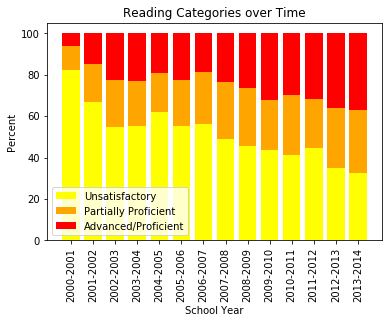

In [9]:
plt.bar(sy, u, color='yellow')
plt.bar(sy, pp, bottom=u, color='orange')
plt.bar(sy, ap, bottom=bars1, color='red')

plt.xticks(sy)
plt.xlabel("School Year")
plt.ylabel('Percent')
plt.xticks(rotation=90)
plt.legend(['Unsatisfactory','Partially Proficient','Advanced/Proficient'], loc = 'lower left')
plt.title('Reading Categories over Time')
# plt.savefig('DL_prof.png')

plt.show()

The graph shows that the proportion of kids in the Unsatisfactory range decreases over time, while the proportion in the Advanced/Proficient range increases.

In [10]:
import scipy.stats as stats

In [11]:
obs = csap4.pivot(index = 'SchoolYear', columns = 'ProficiencyLevel', values = 'csapCount')
obs

ProficiencyLevel,AP,PP,U
SchoolYear,,,
2000-2001,1,2,14
2001-2002,4,5,18
2002-2003,10,10,24
2003-2004,13,12,31
2004-2005,14,14,46
2005-2006,19,19,47
2006-2007,20,27,60
2007-2008,28,33,59
2008-2009,35,37,60


In [12]:
stat = stats.chi2_contingency(observed=obs)
stat

(61.34966897317832,
 0.00011013653487800859,
 26,
 array([[ 4.80784844,  4.38227334,  7.80987821],
        [ 7.63599459,  6.96008119, 12.40392422],
        [12.44384303, 11.34235453, 20.21380244],
        [15.8376184 , 14.43572395, 25.72665765],
        [20.92828146, 19.07577808, 33.99594046],
        [24.03924222, 21.91136671, 39.04939107],
        [30.26116373, 27.58254398, 49.15629229],
        [33.93775372, 30.93369418, 55.1285521 ],
        [37.33152909, 34.0270636 , 60.64140731],
        [41.00811908, 37.3782138 , 66.61366712],
        [42.42219215, 38.66711773, 68.91069012],
        [48.07848444, 43.82273342, 78.09878214],
        [50.05818674, 45.62719892, 81.31461434],
        [49.2097429 , 44.85385656, 79.93640054]]))

This analysis shows that the distributions do indeed change over time, X^2(26) = 61.35, p < .001. When we consider the bar graph and the chi-square statistic together, we can conclude that UNHS is working. Over time, reading scores for DHH children are improving.

The chi-square statistic assumes that all cells have counts of at least 5, and we did violate that. The first two years have cells with counts < 5. So let's delete those rows and rerun the analysis.

In [13]:
obs = obs.drop(index = '2000-2001')
obs = obs.drop(index = '2001-2002')
obs

ProficiencyLevel,AP,PP,U
SchoolYear,,,
2002-2003,10,10,24
2003-2004,13,12,31
2004-2005,14,14,46
2005-2006,19,19,47
2006-2007,20,27,60
2007-2008,28,33,59
2008-2009,35,37,60
2009-2010,47,35,63
2010-2011,45,43,62


In [14]:
stats = stats.chi2_contingency(observed=obs)
stats

(46.92238056952496,
 0.0015022096424176612,
 22,
 array([[12.67224547, 11.47559275, 19.85216179],
        [16.12831241, 14.60529986, 25.26638773],
        [21.31241283, 19.29986053, 33.38772664],
        [24.4804742 , 22.16875872, 38.35076709],
        [30.81659693, 27.90655509, 48.27684798],
        [34.56066946, 31.29707113, 54.14225941],
        [38.0167364 , 34.42677824, 59.55648536],
        [41.76080893, 37.81729428, 65.42189679],
        [43.20083682, 39.12133891, 67.67782427],
        [48.9609484 , 44.33751743, 76.70153417],
        [50.97698745, 46.16317992, 79.85983264],
        [50.11297071, 45.38075314, 78.50627615]]))

After removing the first two years, we still see that the distibution of reading scores is changing over time, X^2(22) = 46.92, p < .01.